In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score



df = pd.read_csv("../dataset/1-CombinedDataset.csv", index_col=0)
df


,DATE,FORECLOSURE,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,MORT30US,BofA_Yield_Index_PCH,CA_Consumer_Price_Index,CPI STICKY
0,2014-01-01,1388,8.2,2.858095,0.071613,1.92538,1.34214,4.4320,1.07487,235.288,1.821814
1,2014-02-01,513,8.1,2.709474,0.066429,1.08537,1.13758,4.3025,0.87364,235.547,1.789186
2,2014-03-01,597,8.0,2.723333,0.078065,1.83138,0.60021,4.3425,1.04621,236.028,1.820857
3,2014-04-01,317,7.8,2.705238,0.090333,-3.67258,0.22288,4.3375,0.66026,236.468,2.025161
4,2014-05-01,488,7.7,2.559048,0.087097,0.39007,0.08087,4.1920,0.88867,236.918,2.128235
...,...,...,...,...,...,...,...,...,...,...,...
100,2022-05-01,166,4.3,2.898095,0.765484,-11.67996,1.39058,5.2300,-3.22395,291.474,4.975575
101,2022-06-01,181,4.2,3.143333,1.205000,-3.47270,0.29177,5.5220,-2.03930,295.328,5.425963
102,2022-07-01,140,3.9,2.896000,1.675806,1.78399,-0.40032,5.4125,-0.40364,295.271,5.629465
103,2022-08-01,202,4.1,2.897826,2.330000,8.15331,-1.15309,5.2225,3.38678,295.620,5.990544


In [2]:
df['mnth_sin'] = df['DATE'].apply(lambda x: np.sin((int(x[5:7])-1)*(2.*np.pi/12)))
df['mnth_cos'] = df['DATE'].apply(lambda x: np.cos((int(x[5:7])-1)*(2.*np.pi/12)))


df['DATE'] = pd.to_datetime(df['DATE']) 
df['DATE_DELTA'] = (df['DATE'] - df['DATE'].min())  / np.timedelta64(1,'D')
feature_labels = (df.columns)
feature_labels = feature_labels.drop(['FORECLOSURE'])
#feature_labels =['DATE_DELTA','CAUR', 'Average DGS', 'DFF', 'NASDAQCOM' ,'ZHVI','BofA_Yield_Index_PCH','CA_Consumer_Price_Index','MORT30US','CPI STICKY', 'mnth_sin','mnth_cos']
#feature_labels =['DATE_DELTA', 'DFF', 'NASDAQCOM' ,'CA_Consumer_Price_Index','CPI STICKY', 'mnth_cos']
X = df[feature_labels]
y = df[['FORECLOSURE']]
X

,DATE,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,MORT30US,BofA_Yield_Index_PCH,CA_Consumer_Price_Index,CPI STICKY,mnth_sin,mnth_cos,DATE_DELTA
0,2014-01-01,8.2,2.858095,0.071613,1.92538,1.34214,4.4320,1.07487,235.288,1.821814,0.000000e+00,1.000000e+00,0.0
1,2014-02-01,8.1,2.709474,0.066429,1.08537,1.13758,4.3025,0.87364,235.547,1.789186,5.000000e-01,8.660254e-01,31.0
2,2014-03-01,8.0,2.723333,0.078065,1.83138,0.60021,4.3425,1.04621,236.028,1.820857,8.660254e-01,5.000000e-01,59.0
3,2014-04-01,7.8,2.705238,0.090333,-3.67258,0.22288,4.3375,0.66026,236.468,2.025161,1.000000e+00,6.123234e-17,90.0
4,2014-05-01,7.7,2.559048,0.087097,0.39007,0.08087,4.1920,0.88867,236.918,2.128235,8.660254e-01,-5.000000e-01,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2022-05-01,4.3,2.898095,0.765484,-11.67996,1.39058,5.2300,-3.22395,291.474,4.975575,8.660254e-01,-5.000000e-01,3042.0
101,2022-06-01,4.2,3.143333,1.205000,-3.47270,0.29177,5.5220,-2.03930,295.328,5.425963,5.000000e-01,-8.660254e-01,3073.0
102,2022-07-01,3.9,2.896000,1.675806,1.78399,-0.40032,5.4125,-0.40364,295.271,5.629465,1.224647e-16,-1.000000e+00,3103.0
103,2022-08-01,4.1,2.897826,2.330000,8.15331,-1.15309,5.2225,3.38678,295.620,5.990544,-5.000000e-01,-8.660254e-01,3134.0


In [3]:
date_delta = X['DATE_DELTA']
feature_labels_less_Date =['mnth_cos', 'mnth_sin', 'CAUR', 'Average DGS', 'DFF', 'NASDAQCOM' ,'ZHVI','BofA_Yield_Index_PCH','CA_Consumer_Price_Index', 'CPI STICKY','MORT30US']
names = {}
for i in range(0,len(feature_labels_less_Date)):
    names[i] = feature_labels_less_Date[i]

X = pd.DataFrame(preprocessing.scale(X[feature_labels_less_Date])).rename(columns = names)
X = X.join(date_delta)
X.shape

(105, 12)

r2_score: 0.5712069826016579 
    n_estimators = 250
    random_state = 0
    test_size = 23


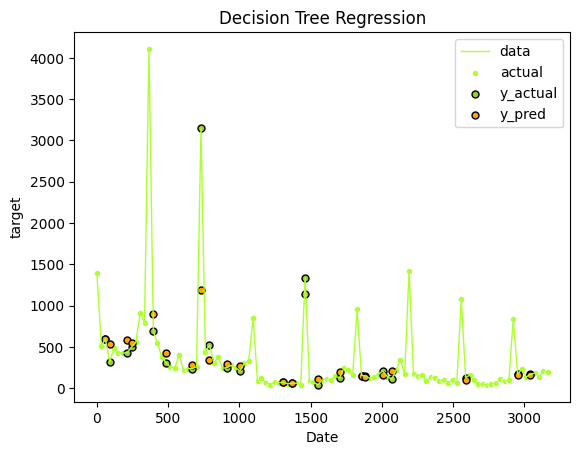

r2_score: 0.9384992926188638 
    n_estimators = 250
    random_state = 1
    test_size = 23


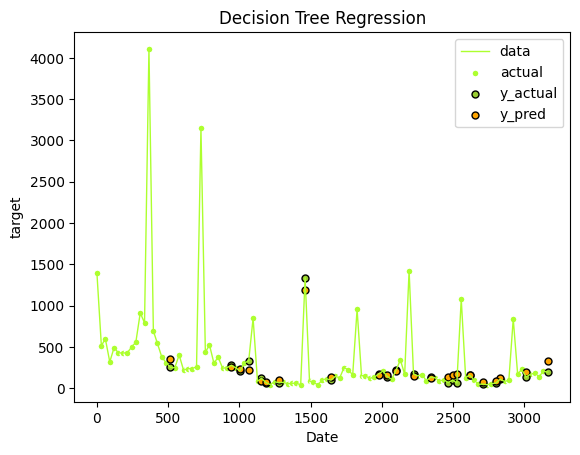

r2_score: 0.521465028618405 
    n_estimators = 250
    random_state = 2
    test_size = 23


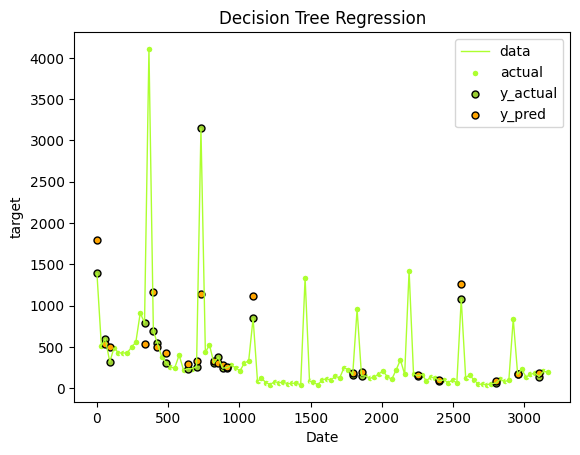

r2_score: 0.816152623794778 
    n_estimators = 250
    random_state = 3
    test_size = 23


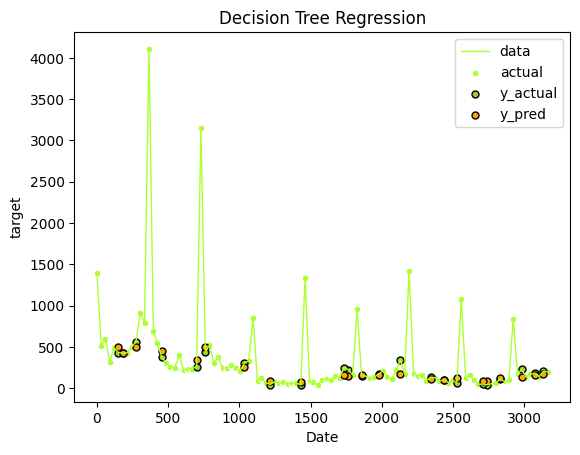

r2_score: 0.5502206341929134 
    n_estimators = 250
    random_state = 4
    test_size = 23


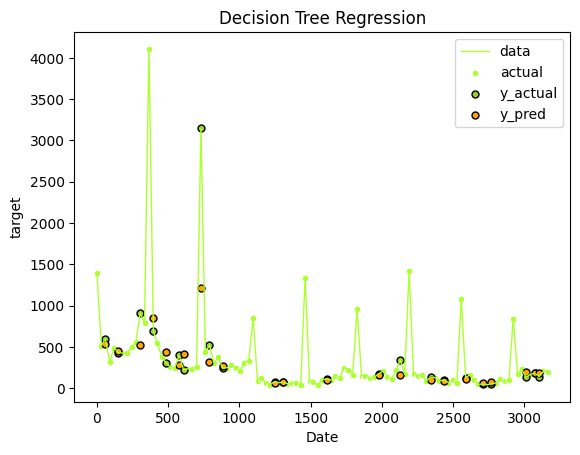

r2_score: 0.8162391594054663 
    n_estimators = 250
    random_state = 5
    test_size = 23


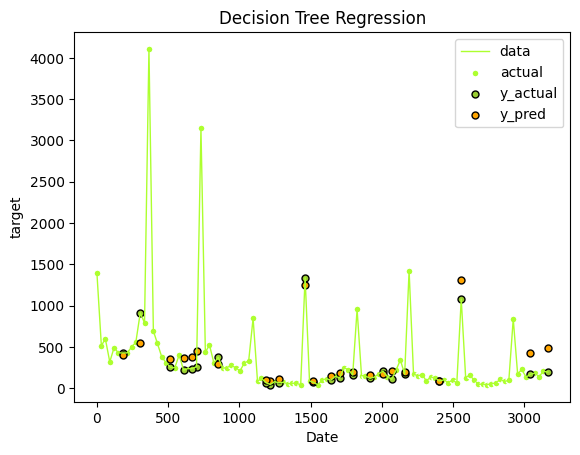

r2_score: 0.47214017122892726 
    n_estimators = 250
    random_state = 6
    test_size = 23


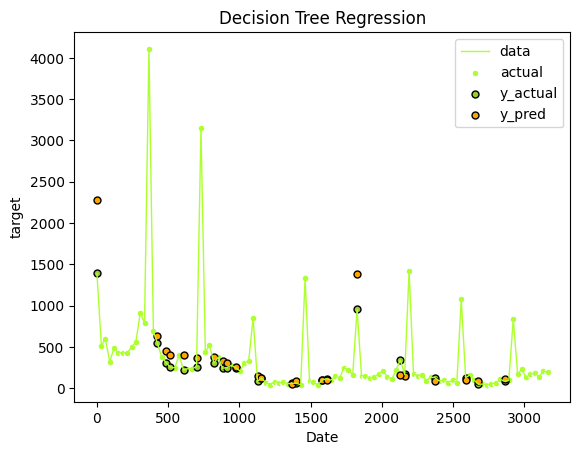

r2_score: 0.4538273769171912 
    n_estimators = 250
    random_state = 7
    test_size = 23


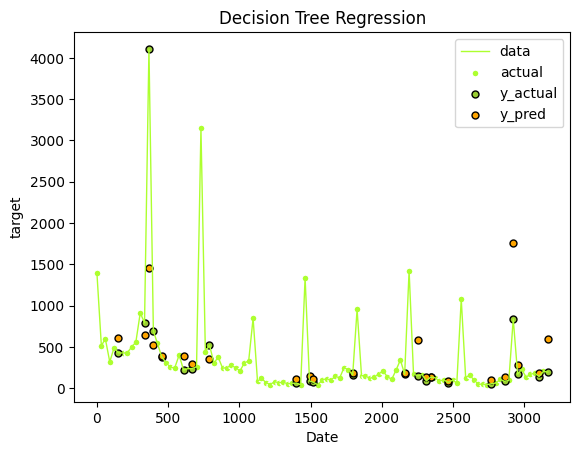

r2_score: 0.5061517845646945 
    n_estimators = 250
    random_state = 8
    test_size = 23


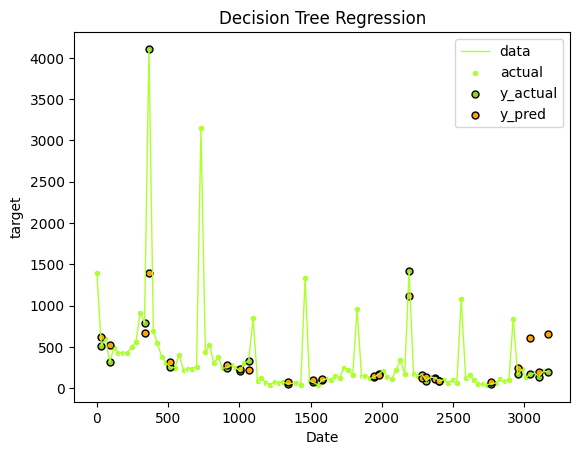

r2_score: 0.8916954751001472 
    n_estimators = 250
    random_state = 9
    test_size = 23


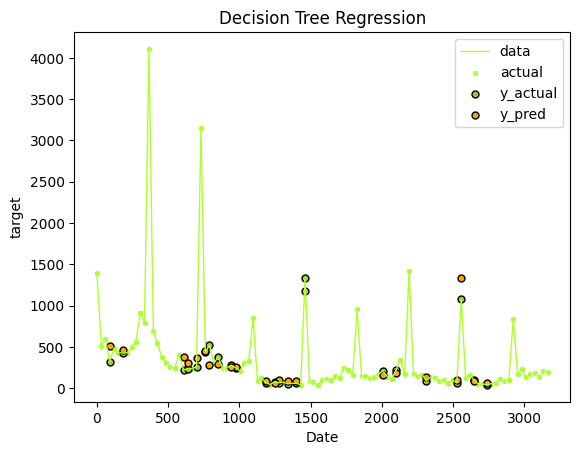

R2 average = 0.5943271390039132


In [4]:
r2_total = 0
for i in range(0,10):
    n_estimators = 250
    test_size = 23
    random_state=i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    regressor = RandomForestRegressor(n_estimators=n_estimators,bootstrap=True, max_features=0.85)
    regressor.fit(X_train,y_train.to_numpy().flatten())
    y_pred = regressor.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    r2_total += r2
    print(f"r2_score: {r2} \n\
    n_estimators = {n_estimators}\n\
    random_state = {random_state}\n\
    test_size = {test_size}")
    # Plot the results
    plt.figure()
    plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1, label="data")
    plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow", label="actual")
    plt.scatter(X_test['DATE_DELTA'], y_test, s=25, edgecolor="black", c="yellowgreen", label="y_actual")
    plt.scatter(X_test['DATE_DELTA'], y_pred,s=25, edgecolor="black", c="orange", label="y_pred")

    plt.xlabel("Date")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()
    
print("R2 average =", r2_total/float(11))

r2_score: 0.8674910653555279 rand_state = 9


<Figure size 640x480 with 0 Axes>

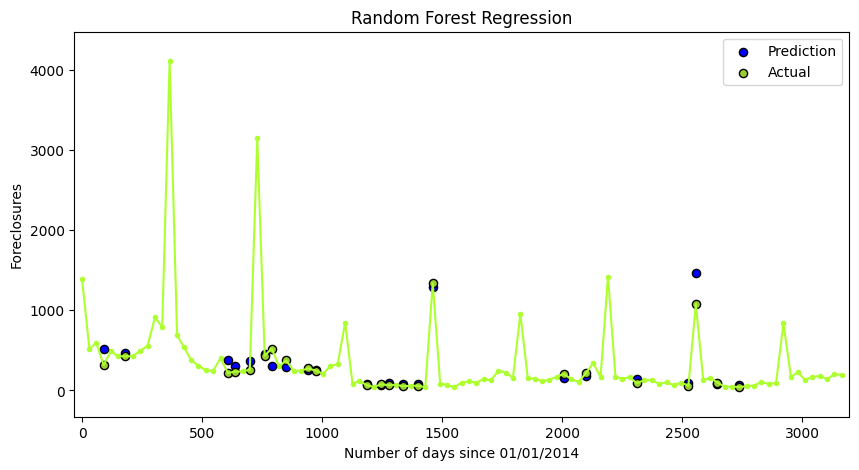

In [5]:
# Plot the results
n_estimators = 250
test_size = 23
random_state=9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
regressor = RandomForestRegressor(n_estimators=n_estimators,bootstrap=True, max_features=0.85)
regressor.fit(X_train,y_train.to_numpy().flatten())
y_pred = regressor.predict(X_test)
y_pred
plt.figure()
plt.figure(figsize=(10,5))
plt.margins(x=0.01,y=0.09)
plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1.5)
plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow")
plt.scatter(X_test['DATE_DELTA'], y_pred,s=35, edgecolor="black", c="blue", label="Prediction")
plt.scatter(X_test['DATE_DELTA'], y_test, s=35, edgecolor="black", c="yellowgreen", label="Actual")
r2 = r2_score(y_test,y_pred)
print(f"r2_score: {r2} rand_state = {i}")

plt.xlabel("Number of days since 01/01/2014")
plt.ylabel("Foreclosures")
plt.title("Random Forest Regression")
plt.legend()
plt.savefig('../plots/RandomForestRegression.png')
plt.show()

R_2: 0.5834034078910754, RMSE 401.95212092228405 i 0
0.5834034078910754
R_2: 0.9509666059197367, RMSE 54.17167324601695 i 1
0.9509666059197367
R_2: 0.5814011841749721, RMSE 411.6199929161302 i 2
0.5814011841749721
R_2: 0.7654497324473097, RMSE 72.26638885770974 i 3
0.7654497324473097
R_2: 0.5785354229131965, RMSE 392.52693184877273 i 4
0.5785354229131965
R_2: 0.867297880948114, RMSE 118.36376016365966 i 5
0.867297880948114
R_2: 0.7020357769110592, RMSE 161.0020860570062 i 6
0.7020357769110592


<Figure size 640x480 with 0 Axes>

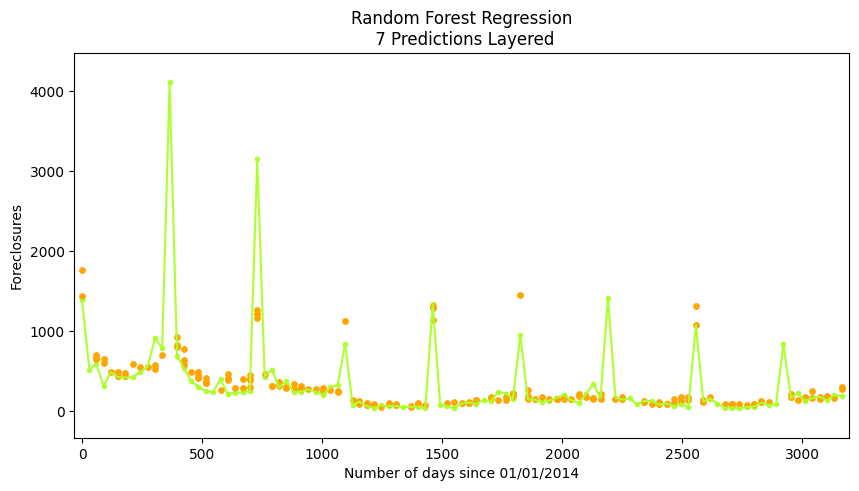

R_2 avg: 0.838181668534244, RMSE 230.2718505730828 i 6


In [26]:
# Plot the results
# Plot the results
avg_rmse = 0
avg_r2 = 0
plt.figure()
plt.figure(figsize=(10,5))
plt.margins(x=0.01,y=0.09)
plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1.5)
plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow")
for i in range(0,7):
    X_train, X_test_3, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=i)
    regressor = RandomForestRegressor(n_estimators=250,bootstrap=True, max_features=0.80, min_weight_fraction_leaf=0.05)
    regressor.fit(X_train,y_train.to_numpy().flatten())
    y_pred_3 = regressor.predict(X_test_3)
    mse = metrics.mean_squared_error(y_test, y_pred_3)
    rmse = np.sqrt(mse)
    print(f"R_2: {r2_score(y_test,y_pred_3)}, RMSE {rmse} i {i}")
    avg_rmse += rmse
    avg_r2 += abs(r2_score(y_test,y_pred_3))
    print(abs(r2_score(y_test,y_pred_3)))

    plt.scatter(X_test_3['DATE_DELTA'], y_pred_3,s=15, c="orange")

plt.xlabel("Number of days since 01/01/2014")
plt.ylabel("Foreclosures")
plt.title("Random Forest Regression\n 7 Predictions Layered")
plt.savefig('../plots/RandomForestRegression_Multiple_runs_periodicmnths_isJan.png')
plt.show()
print(f"R_2 avg: {avg_r2 / i}, RMSE {avg_rmse / (i+1)} i {i}")
